<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
#import piplite
#await piplite.install(['numpy'],['pandas'])
#await piplite.install(['seaborn'])

In [2]:
import pandas as pd
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
#from js import fetch
#import io

#URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(URL)
#boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
# boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [5]:
#boston_df=pd.read_csv(boston_url)
boston_df=pd.read_csv('boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Familiarize yourself with the dataset 

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2: Generate basic statistics and visualizations for upper management. 

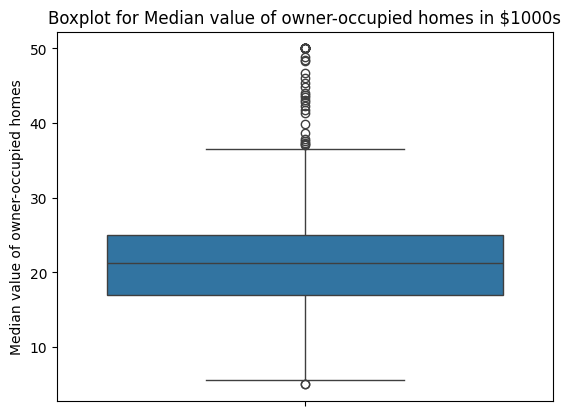

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel('Median value of owner-occupied homes')
plt.title('Boxplot for Median value of owner-occupied homes in $1000s')
plt.show()

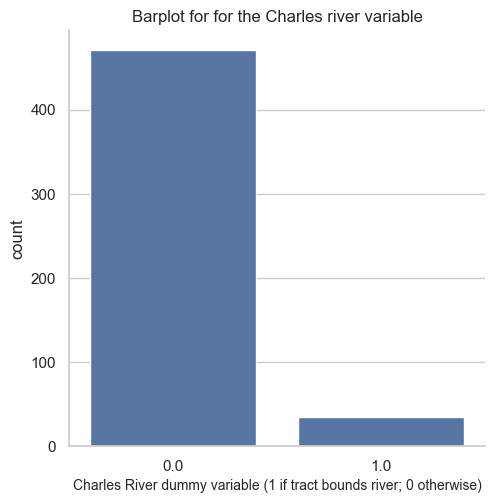

In [8]:
sns.set(style='whitegrid')
#ax = sns.barplot(y='CHAS', data=boston_df)
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)', size=10)
plt.title('Barplot for for the Charles river variable')
plt.show()

In [9]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 years and older'

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


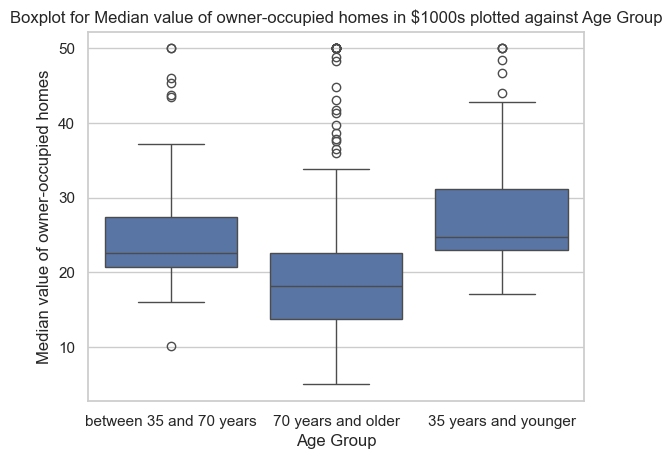

In [11]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Boxplot for Median value of owner-occupied homes in $1000s plotted against Age Group')
plt.show()

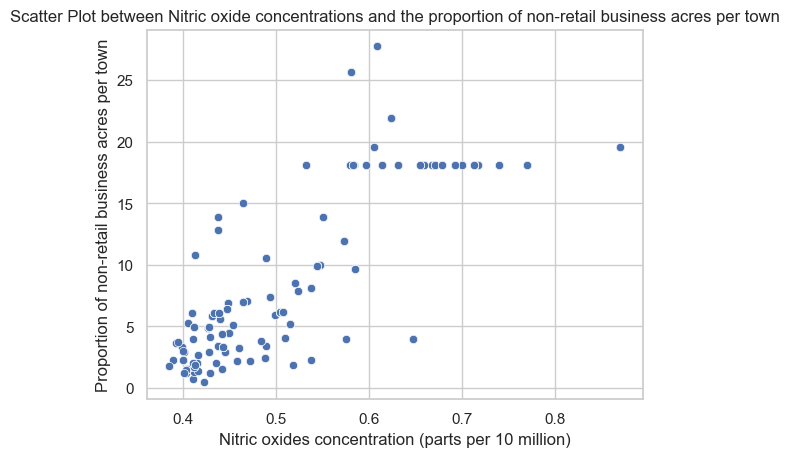

In [12]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Scatter Plot between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

There seems to be a positive correlation between the variables. This means that as the nitric oxide concentration increases, so does the proportion of non-retail business acres per town.

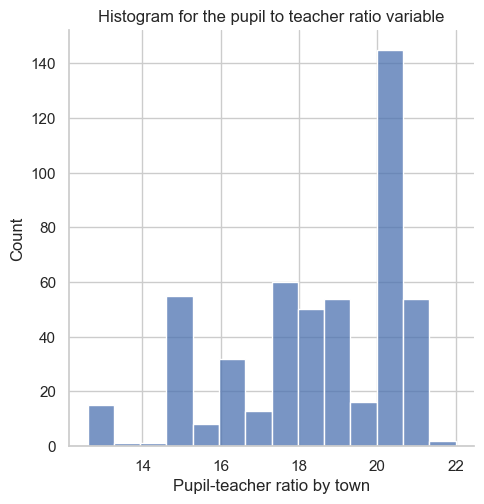

In [13]:
ax = sns.displot(boston_df['PTRATIO'], kde=False)
plt.xlabel('Pupil-teacher ratio by town')
plt.title('Histogram for the pupil to teacher ratio variable')
plt.show()

#### Task 3: Use the appropriate tests to answer the questions provided.

##### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### H0: µ1 = µ2 ("There is no difference in edian value of houses bounded by the Charles river or not.")
##### H1: µ1 /= µ2 ("There is difference in edian value of houses bounded by the Charles river or not.")

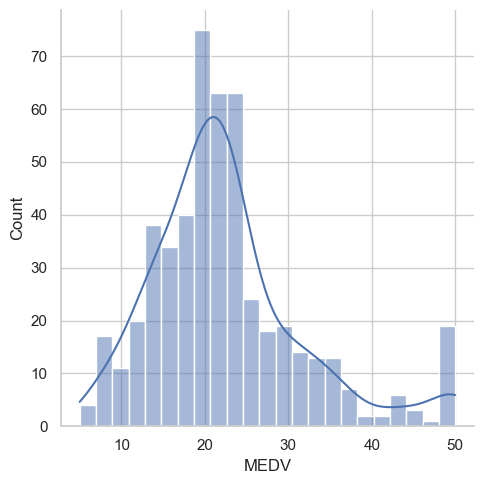

In [14]:
ax = sns.displot(boston_df['MEDV'],
                 #bins=20,
                 kde=True)

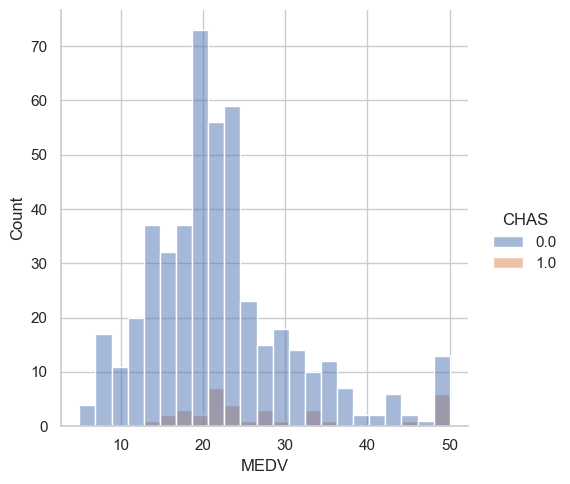

In [15]:
ax = sns.displot(data=boston_df, x='MEDV',
                 hue='CHAS',
                 #bins=20,
                 kde=False)

In [16]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'],
                   center='mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

##### p<0.05 => There is statistically significant evidence that the variances in the groups are unequal 
##### In this case, tests should be performed that do not assume equal variances 
##### (e.g., Welch's test instead of Student's t-test, or Welch's ANOVA instead of standard ANOVA).

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'],
                   equal_var=False)

TtestResult(statistic=np.float64(-3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

##### p-value < 0.05 => The null hypothesis is rejected. 
##### There is statistically significant evidence that the means of the two populations differ.

##### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

##### H0: µ1 = µ2 = µ3 ("There is no difference in median value of houses bounded by all age groups.")
##### H1: µ1 /= µ2 ("At least one of the means differ.")

In [18]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group']=='70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

##### p>0.05 => The null hypothesis is retained (not rejected).
##### There is insufficient statistical evidence to assume that the variances are unequal. 
##### The assumption of equal variances (homoscedasticity) can be retained.
##### In this case, the (standard t-test or) standard ANOVA can be used.

In [19]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                                            boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['age_group']=='70 years and older']['MEDV']
                                           )
print('F_Statistic: {0}, P_Value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P_Value: 1.7105011022702984e-15


##### p<0.05 => Reject the null hypothesis. 
##### There is statistically significant evidence that at least one of the group means differ.

##### 3. Can we conclude that there is no relationship between Nitric oxide concentrations 
##### and proportion of non-retail business acres per town? (Pearson Correlation)

##### H0: Nitric oxide concentrations is NOT correlated with proportion of non-retail business acres per town.
##### H1: Nitric oxide concentrations IS correlated with proportion of non-retail business acres per town.

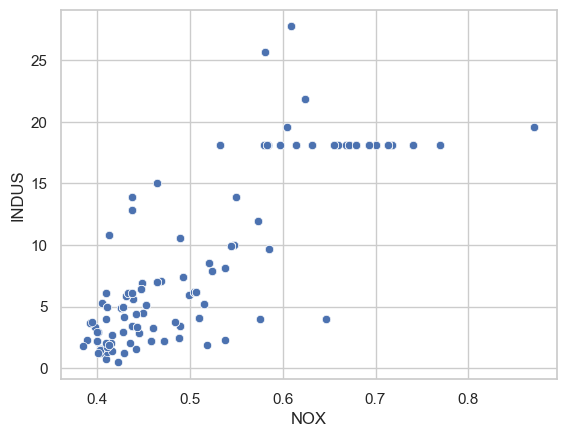

In [20]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

##### p<0.05 => Reject the null hypothesis. There is statistically significant evidence for a linear relationship between the variables.

##### 4. What is the impact of an additional weighted distance to the five Boston employment centres 
##### on the median value of owner occupied homes? (Regression analysis)

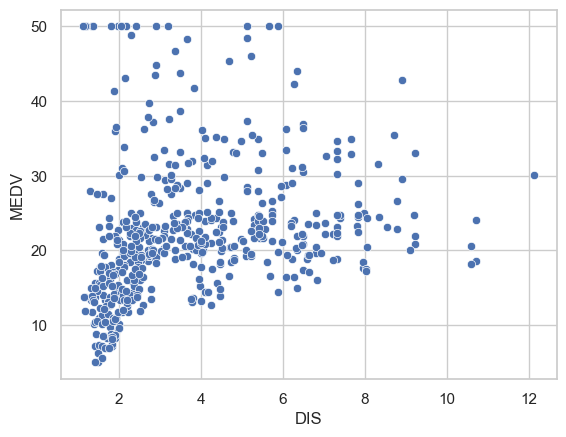

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']
ax = sns.scatterplot(x=X, y=y)

In [23]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        09:30:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### p<0.05 => Reject the null hypothesis. There is statistically significant evidence for a correlation between the variables.
##### R-squared is 0.062 => R is 0.25. Therefore, there is a weak relation between weighted distance to the five Boston employment centres 
##### and the median value of owner occupied homes